In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Basic Data Cleaning

In [5]:
customer_df.columns = [col.lower().replace(' ', '_')for col in customer_df.columns]
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [7]:
# drop customer_id since this is an internal identifier which is not relevant for analysis
customer_df.drop(['customer'], axis=1, inplace=True)

In [8]:
# convert effective to date to datetime
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

### Numericals and Categoricals Split

In [134]:
numericals = customer_df.select_dtypes('number')
categoricals = customer_df.select_dtypes('object')

In [135]:
categoricals.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

#### Check for Unique Values to see if further cleaning is needed

In [136]:
categoricals.apply(lambda x: x.unique())

state               [Washington, Arizona, Nevada, California, Oregon]
response                                                    [No, Yes]
coverage                                   [Basic, Extended, Premium]
education           [Bachelor, College, Master, High School or Bel...
employmentstatus    [Employed, Unemployed, Medical Leave, Disabled...
gender                                                         [F, M]
location_code                                [Suburban, Rural, Urban]
marital_status                            [Married, Single, Divorced]
policy_type             [Corporate Auto, Personal Auto, Special Auto]
policy              [Corporate L3, Personal L3, Corporate L2, Pers...
renew_offer_type                     [Offer1, Offer3, Offer2, Offer4]
sales_channel                       [Agent, Call Center, Web, Branch]
vehicle_class       [Two-Door Car, Four-Door Car, SUV, Luxury SUV,...
vehicle_size                                  [Medsize, Small, Large]
dtype: object

- I would proceed with data as is for now

#### Plot Categorcial Data

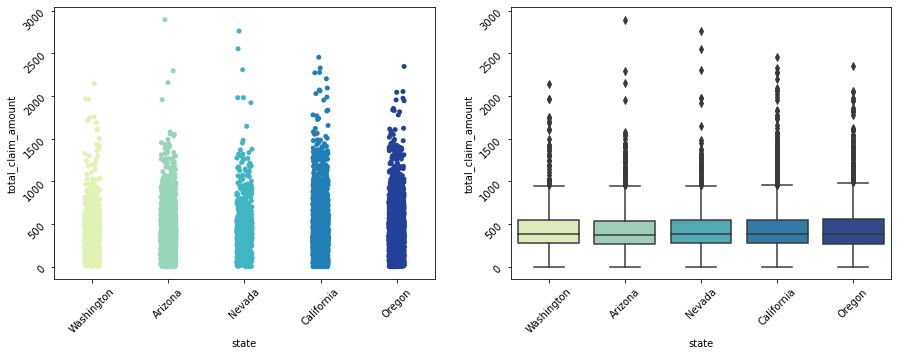

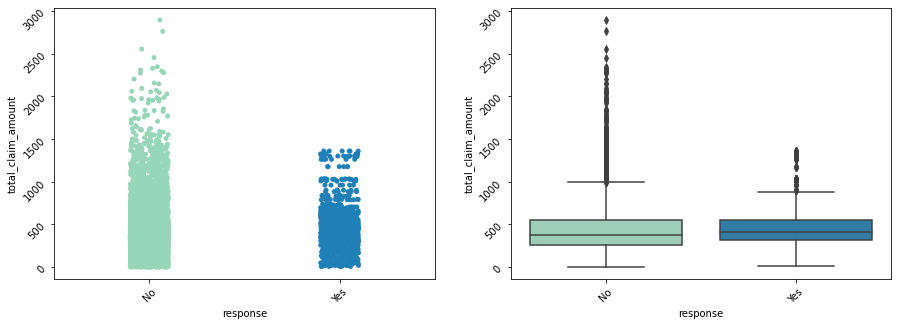

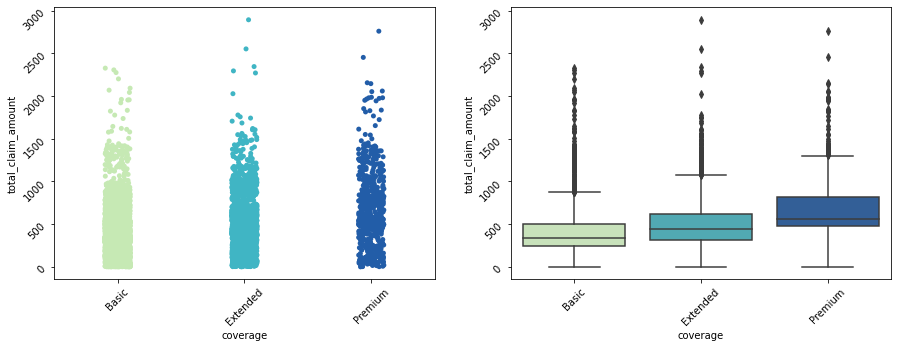

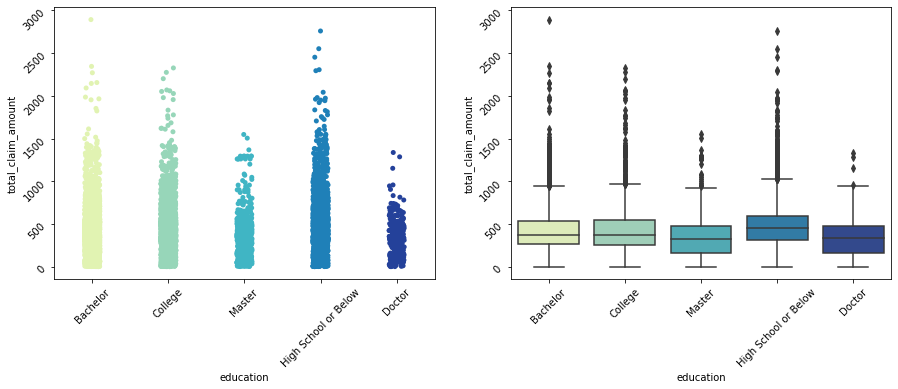

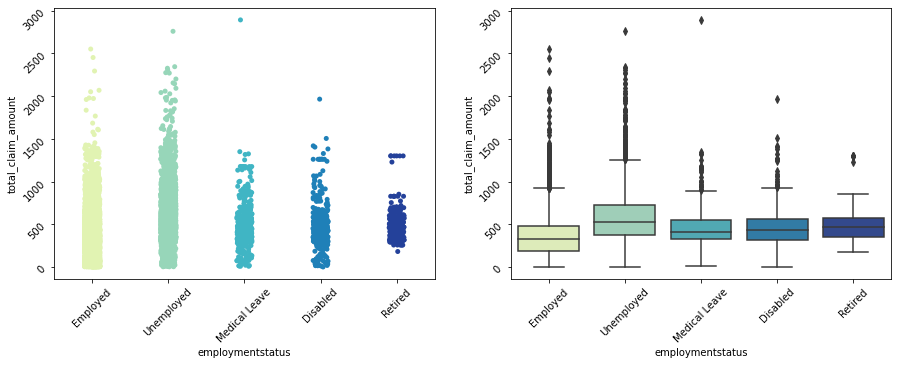

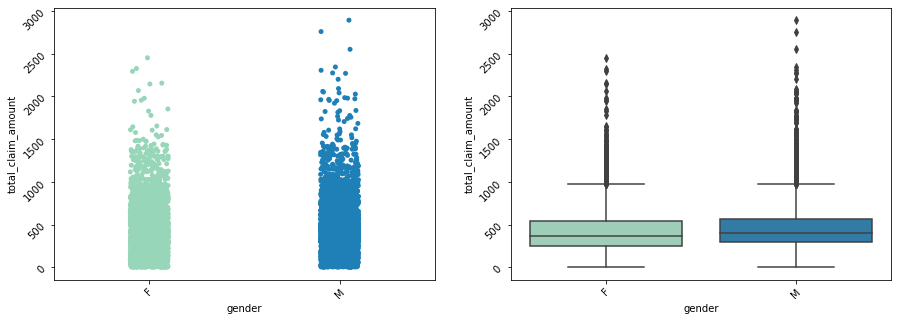

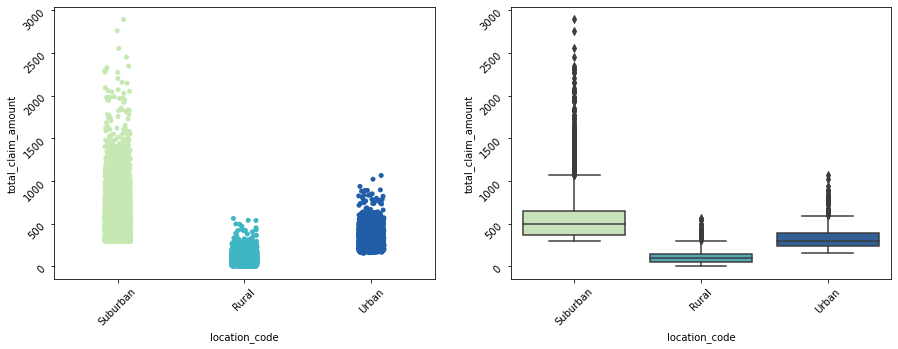

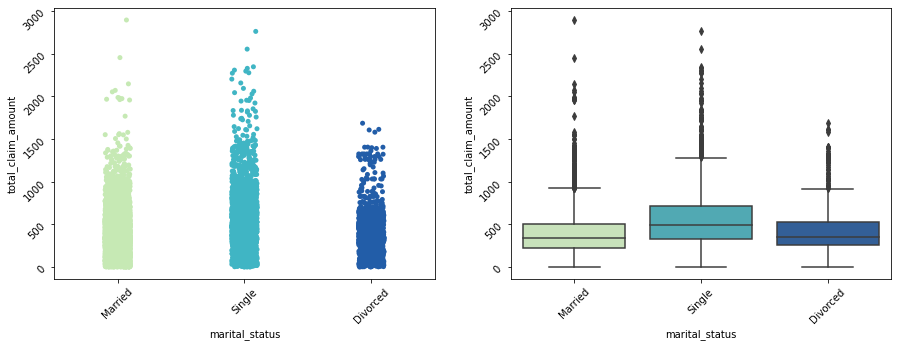

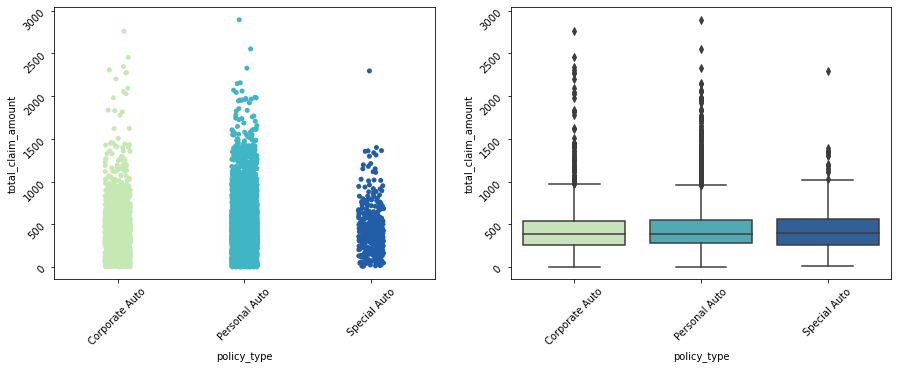

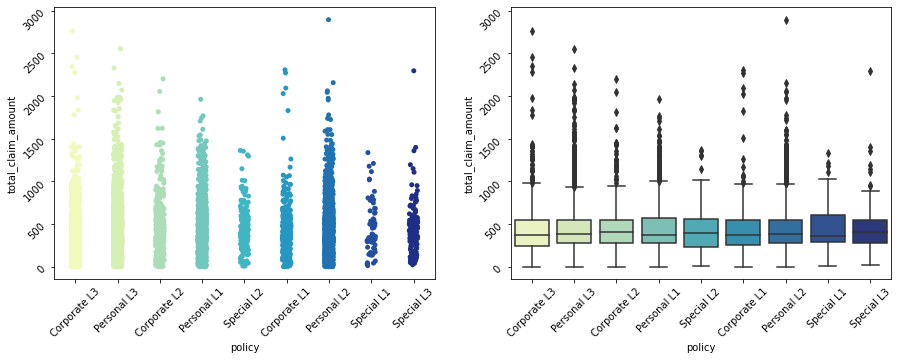

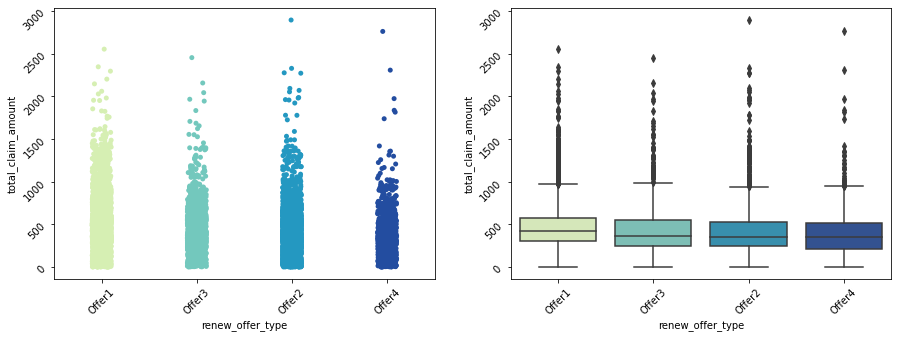

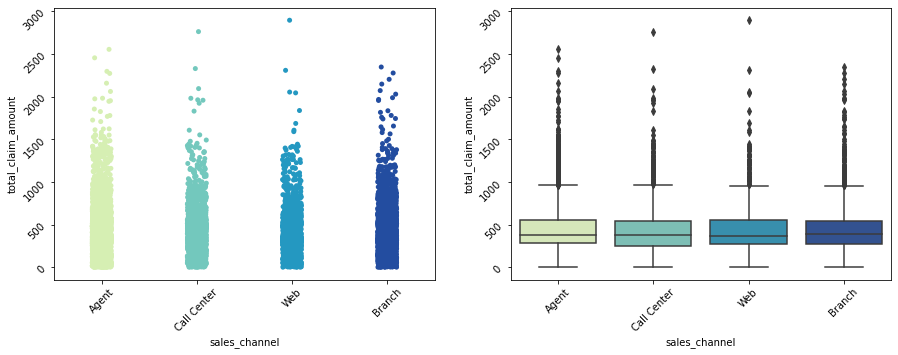

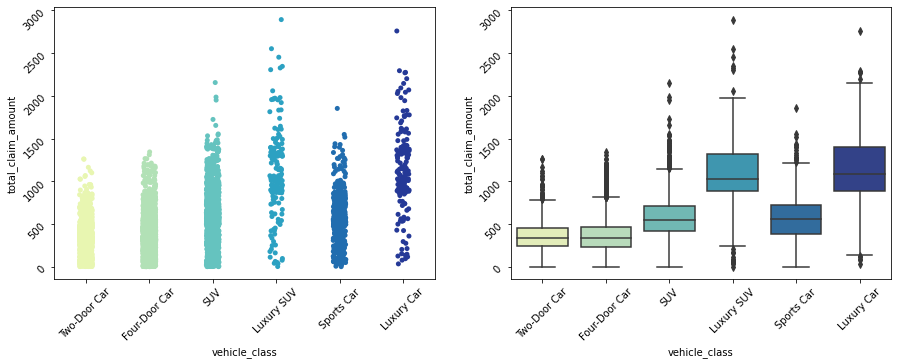

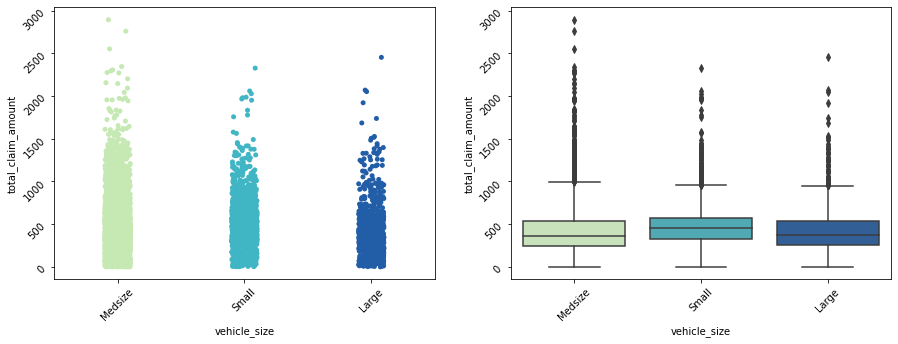

In [137]:
for col in categoricals:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.stripplot(x=customer_df[col], y=customer_df["total_claim_amount"], 
                  data=customer_df, palette="YlGnBu", dodge=True, ax=ax[0])
    ax[0].tick_params(labelrotation=45)
    
    sns.boxplot(x=customer_df[col], y=customer_df['total_claim_amount'], data=customer_df, palette='YlGnBu', ax=ax[1])
    ax[1].tick_params(labelrotation=45)
    plt.show()
    

- Categorcial feature is each plotted against total_claims_amount
- I chose strip plot and boxplot to visualize the data
- I can quickly assess the outliers using these plots and also the distributions and median

In [138]:
# untils func to be able to display categorical feature in context to another categorical
# hue_1 and hue_2 are context for the plots, hue_3 is fallback if col same as hue_1 / hue_2
def plot_categoricals_in_context(df, hue_1, hue_2, hue_3):
    for col in df.select_dtypes('object'):
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))

        sns.stripplot(x=col, y="total_claim_amount", hue=(hue_1 if col != hue_1 else hue_3), 
                      data=df, palette="YlGnBu", dodge=True, ax=ax[0])
        ax[0].tick_params(labelrotation=45)

        sns.violinplot(data=df, x=col, y="total_claim_amount", hue=(hue_2 if col != hue_2 else hue_3),
                       palette="YlGnBu", ax=ax[1])
        ax[1].tick_params(labelrotation=45)
        plt.show()

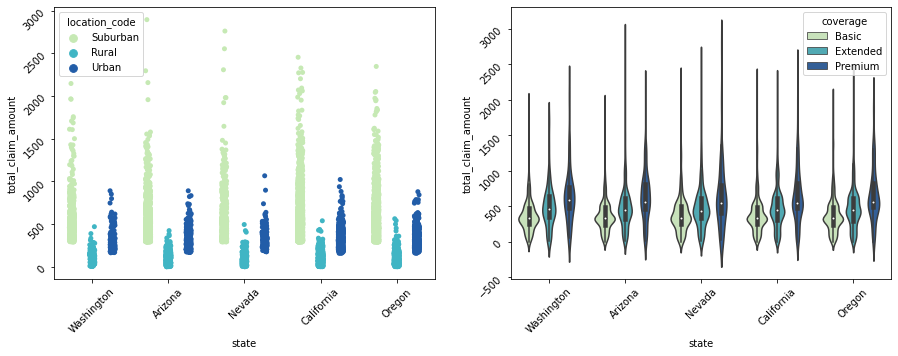

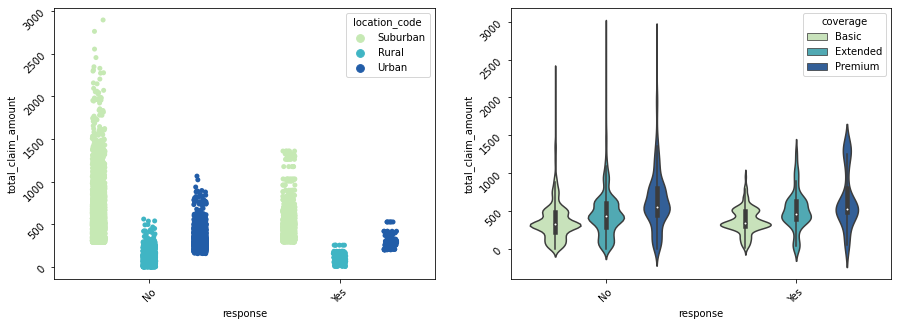

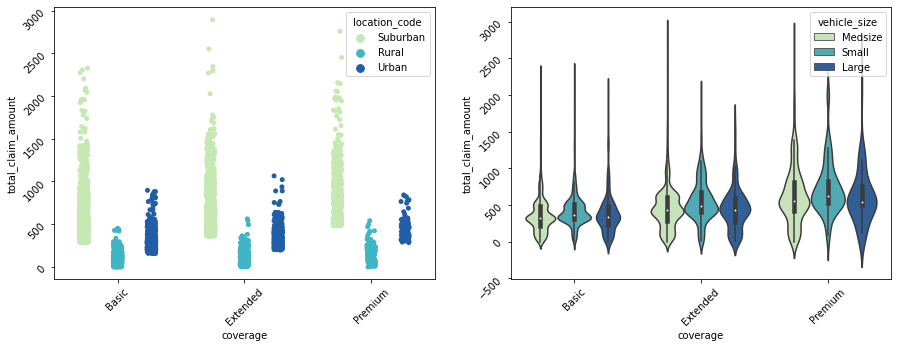

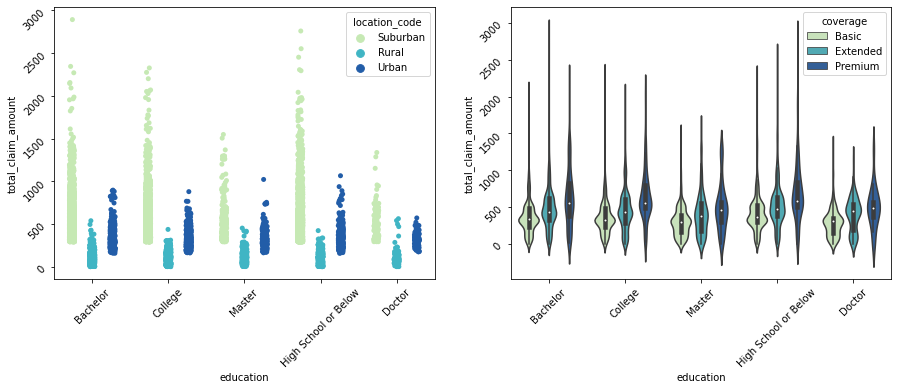

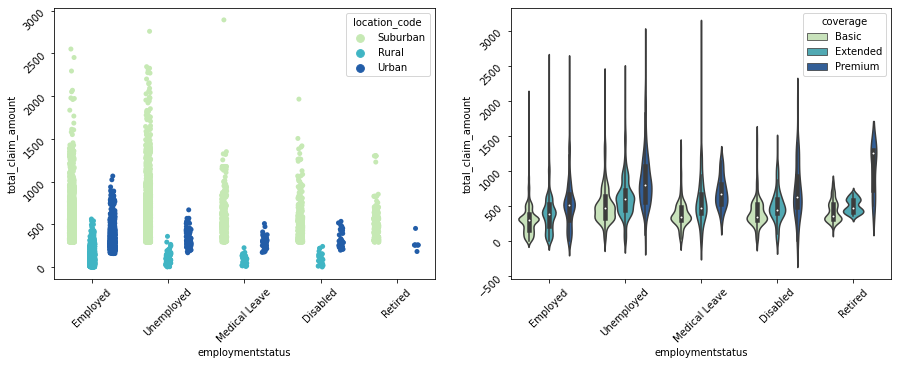

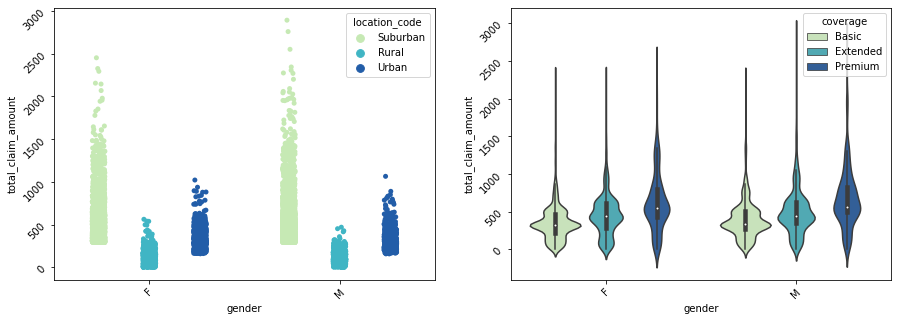

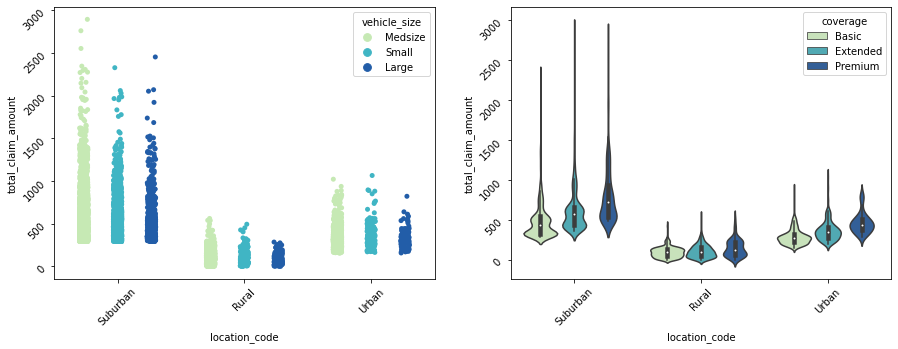

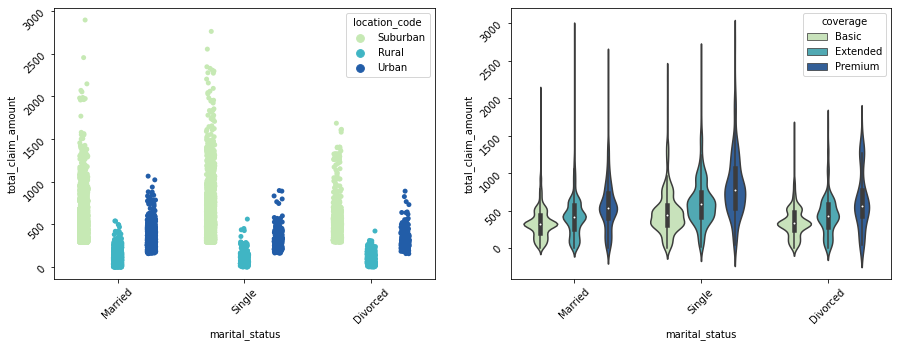

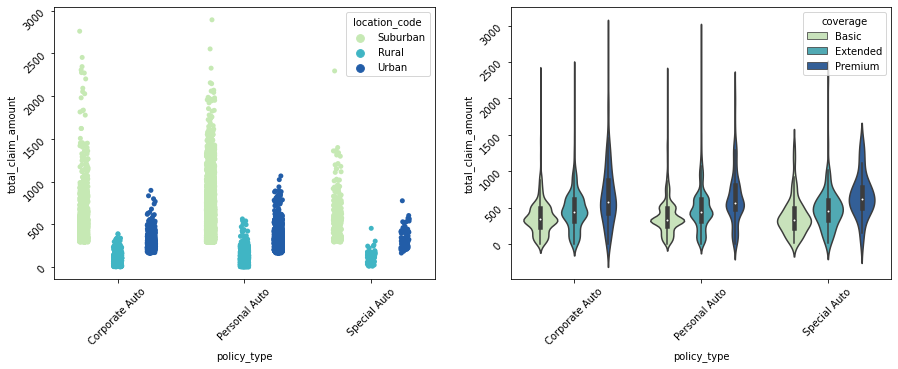

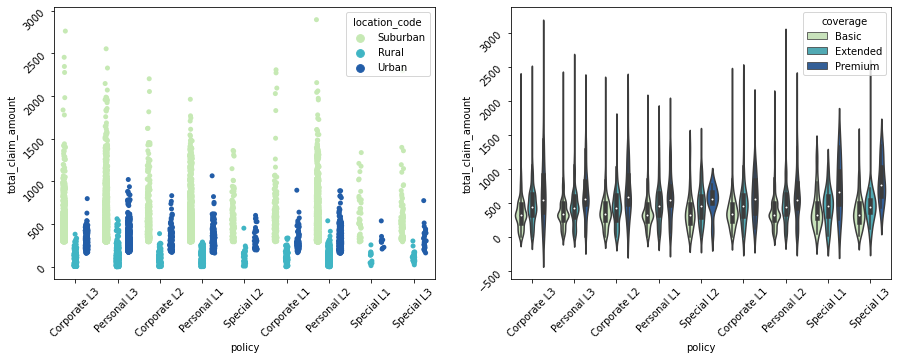

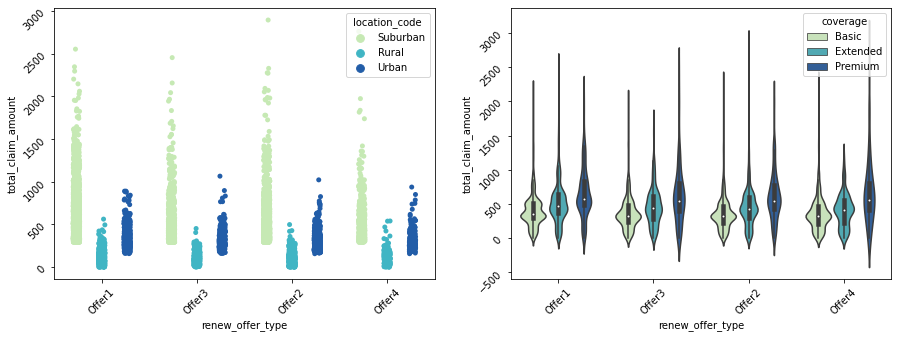

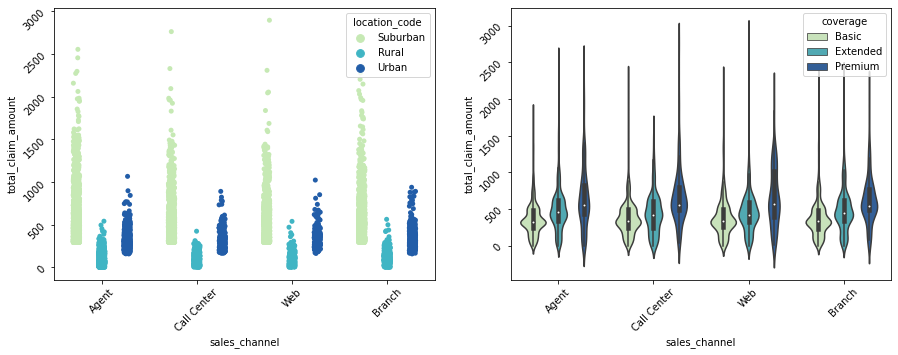

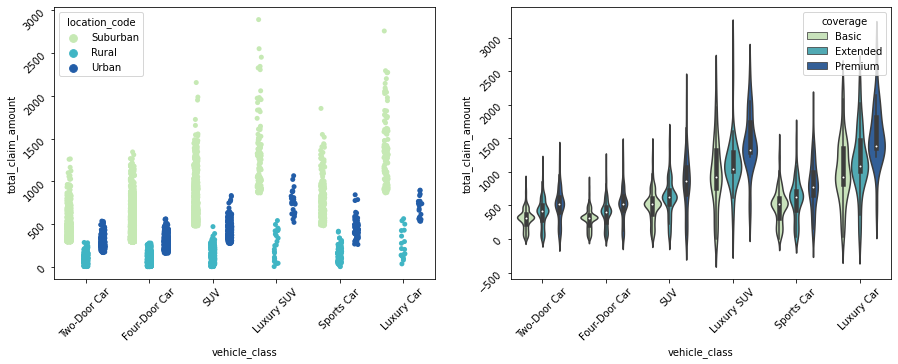

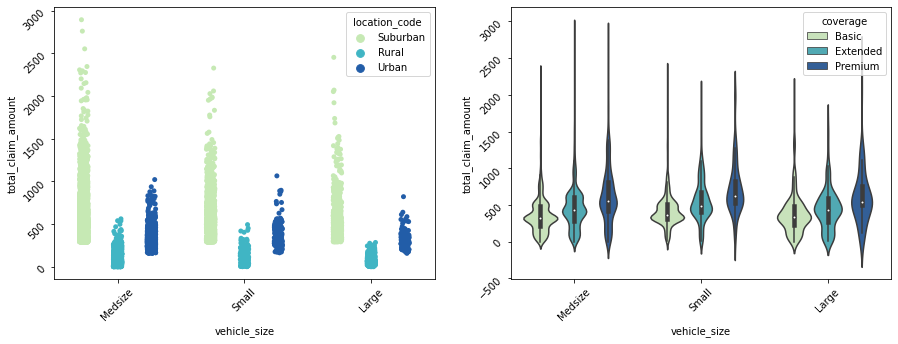

In [139]:
 plot_categoricals_in_context(customer_df, 'location_code', 'coverage', 'vehicle_size')

- I tried another approach here where the cattegorical data is set in context with hue
- This seems very usfull, however if there are a lot of unique values in categorical feature, it becomes very hard to assess the figure quickly

- Possible improvement steps (JUST for EDA!):
    - bucket the unique values where their value count is > 5 

In [140]:
categoricals.apply(lambda x: x.nunique()).sort_values(ascending=False)

policy              9
vehicle_class       6
state               5
education           5
employmentstatus    5
renew_offer_type    4
sales_channel       4
coverage            3
location_code       3
marital_status      3
policy_type         3
vehicle_size        3
response            2
gender              2
dtype: int64

In [141]:
categoricals['policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [143]:
df_trimmed = customer_df
df_trimmed['policy'] = [val.split(' ')[0] for val in df_trimmed['policy']]

In [144]:
df_trimmed['policy'].unique()

array(['Corporate', 'Personal', 'Special'], dtype=object)

In [145]:
df_trimmed['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [146]:
# for vehicle class let's combine Luxury SUV, Luxury Car and Sports Car to Luxury Car
# [f(x) for x in sequence if condition]
df_trimmed['vehicle_class'] = ['Luxury Car'if val == 'Sports Car' or val == 'Luxury SUV' else val for val in df_trimmed['vehicle_class']]

In [147]:
df_trimmed['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury Car'], dtype=object)

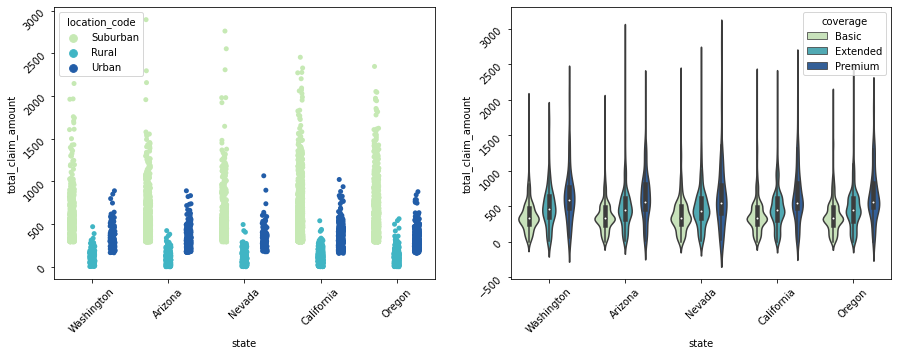

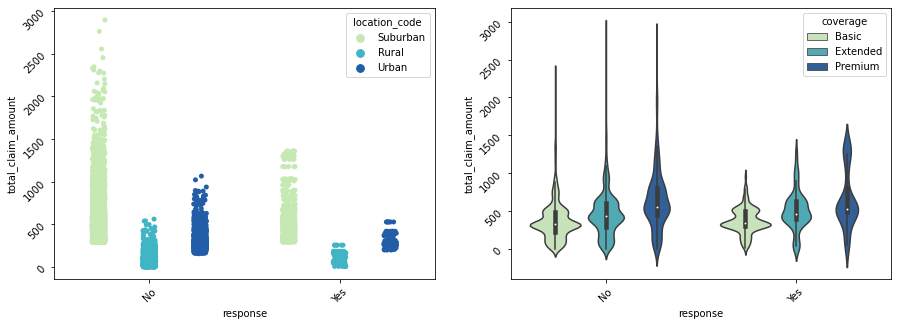

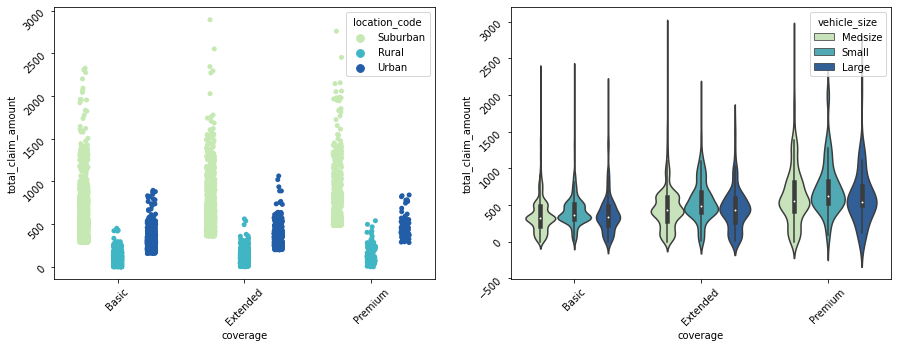

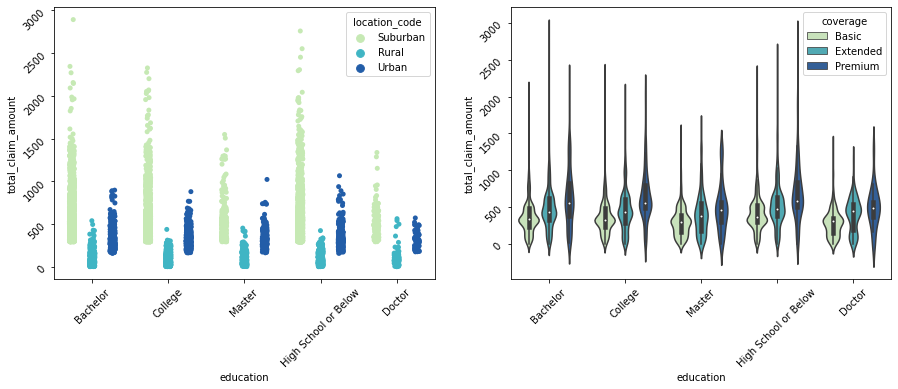

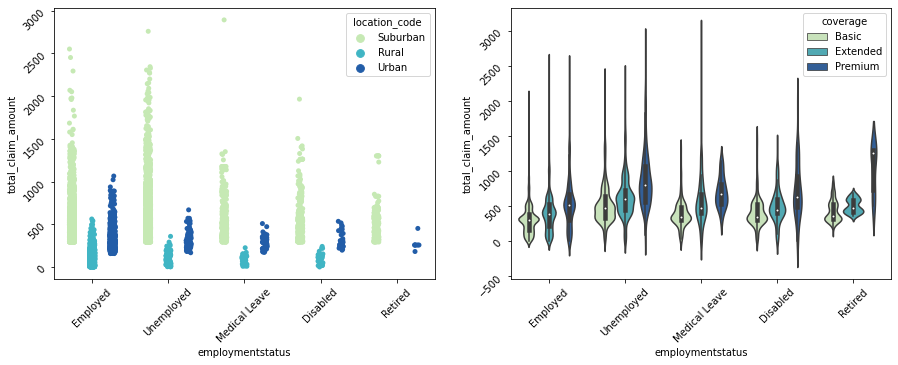

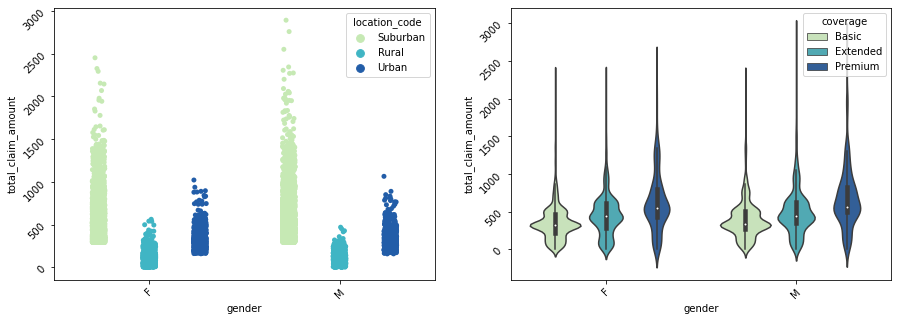

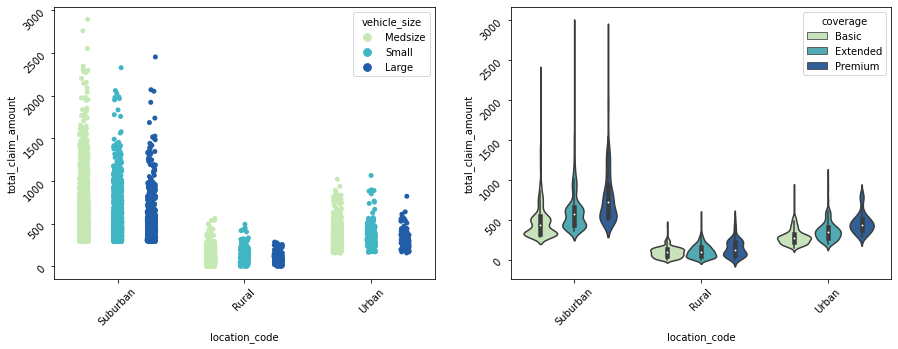

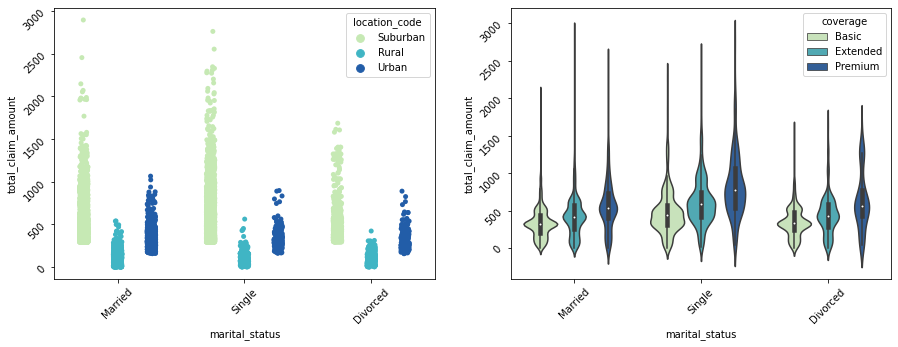

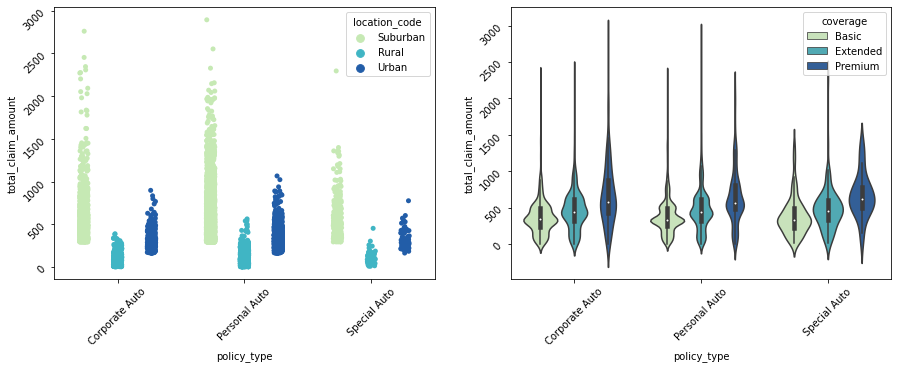

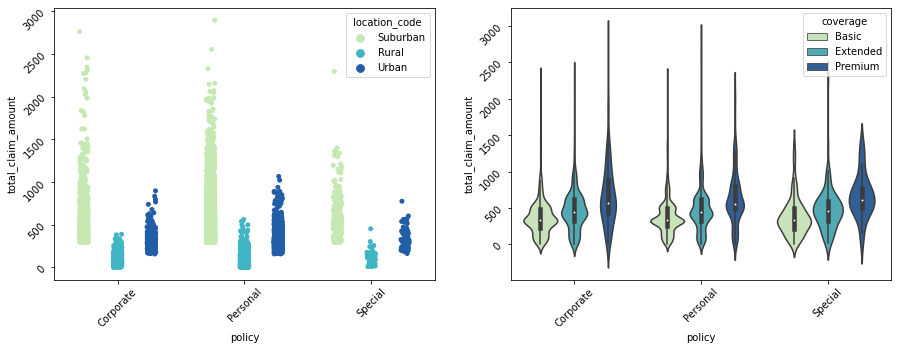

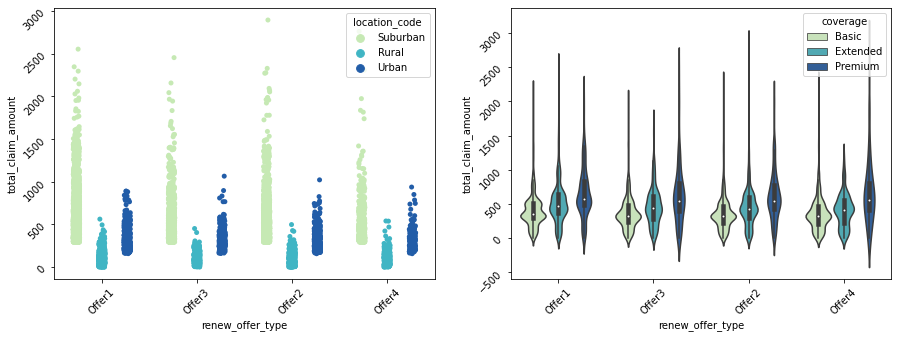

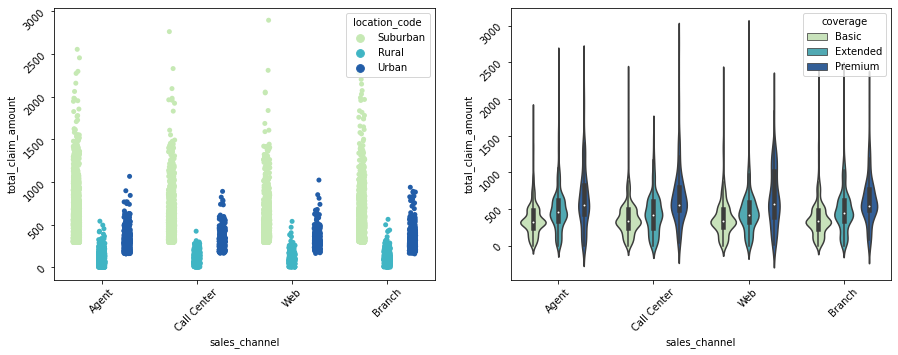

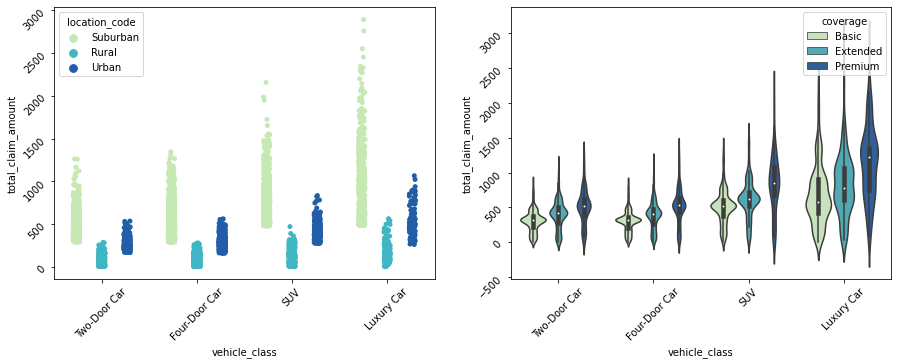

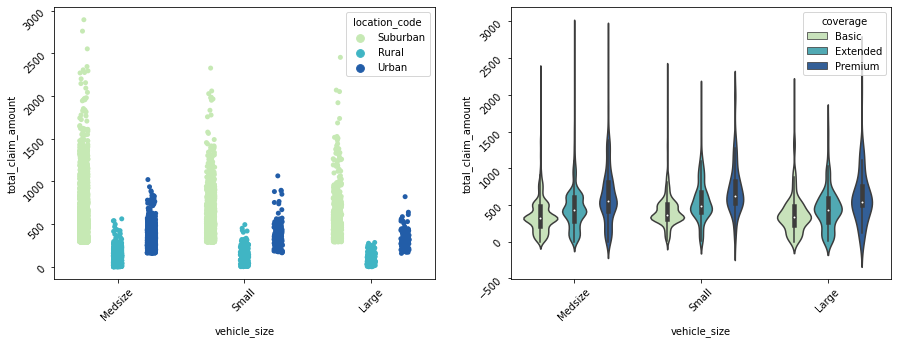

In [148]:
 plot_categoricals_in_context(df_trimmed, 'location_code', 'coverage', 'vehicle_size')